In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# ニューラルネットワーク

## パーセプトロンからニューラルネットワークへ
<div style='display: flex;'>
    <div  style='width: 400px; margin-right: 10px;'>
        <div>
            ↓ニューラルネットワークの例
        </div>
        <div>
            <img src='https://image.itmedia.co.jp/ait/articles/2003/24/di-gsdl0102.gif' />
        </div>
    </div>
    <div style='width: 383px;'>
        <div>
            ↓パーセプトロンの図
        </div>
        <div>
            <img src='https://city3939.com/wp-content/uploads/2018/10/%e3%83%91%e3%83%bc%e3%82%bb%e3%83%97%e3%83%88%e3%83%ad%e3%83%b30.png' />
        </div>
    </div>
</div>
<p>構造はたいして差がないように感じるが。。。</p>

### 異なるポイント

<div>
    <p>１．ニューラルネットワークには、バイアス項というものが存在するようになる</p>
    <img style="width: 400px;" src="https://miro.medium.com/v2/resize:fit:1100/1*crac_8m0q73ajZ4Nqu3Rzw.jpeg" />
</div>
<div>
    <p>２．前からの入力を関数（活性化関数）に通してから出力（次の層に伝達）している</p>
    <img style="width: 400px;" src="https://miraiecosharing1.com/wp-content/uploads/2019/12/image-22.png" />
    <img style="width: 400px;" src="https://data-analysis-stats.jp/wp-content/uploads/2021/01/activation-function-01a.png" />
</div>

また、パーセプトロンもニューラルネットワークで実装出来ます   
$ h(x) = 
    \begin{cases}
        {0 ~ (x \le 0)}\\
        {1 ~ (x > 0)}
    \end{cases}
$   
$y = h(b + w_1x_1 + w_2x_2)$   

<p>なお、パーセプトロンという言葉を利用する際に、正確にこれだということは決まっていないようです</p>

## 活性化関数
活性化関数にはいろいろなものがありますが、ここでは以下の３つについてみて行きます
- ステップ関数
- シグモイド関数
- ReLU関数

### ステップ関数
ステップ関数は、パーセプトロンと同じ機能を果たすための関数であり、すでに、説明したとおりの関数になっています   
$ h(x) = 
    \begin{cases}
        {0 ~ (x \le 0)}\\
        {1 ~ (x > 0)}
    \end{cases}
$

In [2]:
def step_function_demo(x):
    if x > 0:
        return 1
    else:
        return 0
    

In [3]:
# 実は上のコードでは、numpy配列を入力に出来ないので、対応させた関数を実装しなおす
def step_function(x: np.ndarray):
    y = x > 0
    y = y.astype('int')
    return y


### シグモイド関数   
$$h(x) = \frac{1}{1 + exp(-x)}$$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

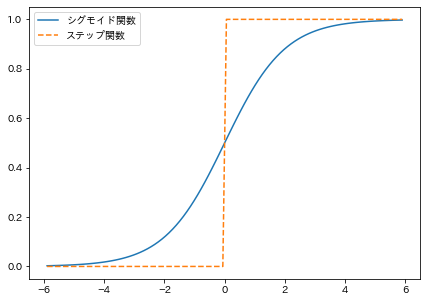

In [5]:
x = np.linspace(-5.9, 5.9, 100)

plt.figure(figsize=(7, 5))
plt.plot(x, sigmoid(x), label='シグモイド関数')
plt.plot(x, step_function(x),linestyle='--', label='ステップ関数')
plt.legend()
plt.show()

**共通点と異なる点**
共通点
- おおよそ0~1の範囲に従っている
- 非線形
異なる点
- 滑らかさ

ニューラルネットワークでは、活性化関数に、非線形関数を利用しなければなりません。   
線形関数（恒等関数など）を用いると、ニューラルネットワークで層を深くすることの意味名が無くなってしまいます

### ReLU関数
$ h(x) = 
    \begin{cases}
        {0 ~ (x \le 0)}\\
        {x ~ (x > 0)}
    \end{cases}
$   
上にあるように，0よりも大きい時はそのままの値を返し，0よりも小さな値ときは，0を返すようにしている

In [6]:
def ReLU(x):
    return np.maximum(x, 0)

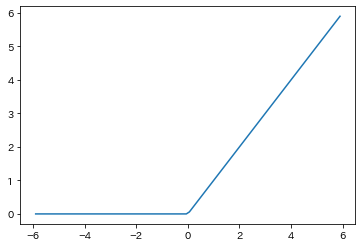

In [7]:
plt.plot(x, ReLU(x))
plt.show()

## 多次元配列の計算
### 多次元配列とは
数字の集合の事．
百聞は一見に如かずということで，コードで色々と実装してみる．

In [8]:
A = np.array([1, 2, 3, 4])
print('配列の形：\n',A)
print('次元数：', np.ndim(A))
print('配列の形：', A.shape)
print(A.shape[0])

配列の形：
 [1 2 3 4]
次元数： 1
配列の形： (4,)
4


In [9]:
B = np.array([[1,2], [3,4], [5,6]])
print('配列の形：\n', B)
print('次元数：', np.ndim(B))
print('配列の形：', B.shape)
print(B.shape[0])

配列の形：
 [[1 2]
 [3 4]
 [5 6]]
次元数： 2
配列の形： (3, 2)
3


### 多次元配列の計算
<img style="width: 700px;" src="https://cdn-ak.f.st-hatena.com/images/fotolife/t/takunology/20200303/20200303134613.png" />

In [10]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[4, 3], [2, 1]])

# 行列の積を実装
np.dot(A, B)

array([[ 8,  5],
       [20, 13]])

In [11]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[6, 5], [4, 3], [2, 1]])
np.dot(A, B)

array([[20, 14],
       [56, 41]])

### 行列計算がそもそも可能かどうかについて
**`行列の形状が大切`**   
(行数，列数)として計算が可能な形状となるのは   
$AB = C$のとき，Aの列数とBの行数が一致しなければ計算できない   
出力の形状は，Aの行数とBの列数

In [12]:
I_1 = np.array([[1], [1], [1]])
I_2 = np.array([1, 1, 1])
print(A.shape, I_1.shape)
print(np.dot(A, I_1), end='\n\n')
print(A.shape, I_2.shape)
print(np.dot(A, I_2), end='\n\n')

(2, 3) (3, 1)
[[ 6]
 [15]]

(2, 3) (3,)
[ 6 15]



上の例でも分かるように，1次元配列（ベクトル）と2次元配列は計算が可能である．その際，都合の良いような2次元配列に変換され，計算された後，出力も1次元配列に変換されている
- 例えば，上の二つ目の例だと，I_2の形状が1x3として認識されると計算できない

### なぜ行列の計算を紹介するのか
それは行列計算によって，ニューラルネットワークの各層の計算が表現されるからである．   
$X = \left[\begin{matrix} x_1 & x_2 \end{matrix}\right]$, `ベクトルであることに注意`   
$W = \left[\begin{matrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{matrix}\right]$
```python
X.shape: (2,)   
W.shape: (2, 3)   
```
このとき，$XWを計算すると$   
$XW$   
$ =  \left[\begin{matrix} x_1 & x_2 \end{matrix}\right]\left[\begin{matrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{matrix}\right]$   
$ = \left[\begin{matrix} x_1w_{11} + x_2w_{12} & x_1w_{21} + w_2w_{22} & x_1w_{31} + x_2w_{32} \end{matrix}\right]$   
$ = \left[\begin{matrix} y_1 & y_2 & y_3\end{matrix}\right]$   

In [13]:
X = np.array([1, 2])
W = np.array([[1, 2, 3], [4, 5, 6]])

Y = np.dot(X, W)
print(f'{X.shape} {W.shape} -> {Y.shape}')


(2,) (2, 3) -> (3,)


## 3層ニューラルネットワークの実装
### 記号の確認
|第1層の重み付き和|第2層の重み付き和|
|-|-|
|$A^{(1)}=XW^{(1)}+B^{(1)}$|$A^{(2)}=Z^{(1)}W^{(2)}+B^{(2)}$|

$X=\left[\begin{matrix} x_1 & x_2 \end{matrix}\right]$<br><br>
$B^{(1)} = \left[\begin{matrix} b_1^{(1)} & b_2^{(1)} & b_3^{(1)}\end{matrix}\right]$<br><br>
$W^{(1)} = \left[\begin{matrix}
    w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
    w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{matrix}\right]$
$A^{(1)} = \left[\begin{matrix} a_1^{(1)} & a_2^{(1)} & a_3^{(1)}\end{matrix}\right]$<br><br>
$Z1 = sigmoid(A1)$

<p>上の添え字：何番目の層</p>
<p>下の添え字の左：次の層の何番目のニューロンか（行先）</p>
<p>下の添え字の右：前の層の何番目のニューロンか（どこからか）</p>


In [14]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1, end='\n\n')

# このようにすると，一気に配列内の要素に対してシグモイド関数が適用される
print(Z1)
print(Z1.shape)
print(type(Z1))

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]

[0.57444252 0.66818777 0.75026011]
(3,)
<class 'numpy.ndarray'>


In [15]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2)


(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


In [16]:
# 恒等関数
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3)
Y = identity_function(A3)


### ニューラルネットワークの出力までをまとめて実装

In [17]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.21682708 0.49627909]


これでニューラルネットワークの内部の実装が出来ました．次は，出力の為の層を設計していきます

## 出力層の設計
一般的に，出力層での活性化関数は，回帰タスクでは恒等関数，分類タスクだとsoftmax関数．   
恒等関数は説明する必要がないと思いますので省きますが，softmax関数について，以下に示します．   
$$y_k = \frac{\exp(a_k)}{\sum{}_{i=1}^{n}\exp(a_i)}$$
この式は，k番目の要素となる確率を表すことになります．   
確認してみると分かりますが，すべてのkの確率を足し合わせると，1になるように設計されています．
出力層のニューロンの数を，出力として取り得るクラスの数に相当させることで，クラスへの生起確率を取得するという構造になっています．

In [18]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

print(np.sum(y))

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
1.0


### ソフトマックス関数の実装上での問題点
#### オーバーフロー
コンピュータには，オーバーフローという現象が生じます．   オーバーフローについて簡単に説明すると，値が大きすぎて，コンピュータが1つの数値を表現する為に用意している領域からはみ出ている状態のことです．   
#### 指数関数はオーバーフローに注意する必要がある
<div>
<p>指数関数の増加の度合いは，ほかの一般的な関数に比べて非常に高いです．</p>
<img style="width: 600px;" src="https://camo.qiitausercontent.com/cbeacd4a39529a3fdbb5e0b422e7a1bb459468e0/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e61702d6e6f727468656173742d312e616d617a6f6e6177732e636f6d2f302f3130363935362f64366164316330622d663866302d373135372d326535342d3130356365626635306237332e6a706567" />
</div>

$$y_k = \frac{\exp(a_k)}{\sum_{i=1}^n{\exp(a_i)}}$$

従って，このまま実装すると，ソフトマックス関数の計算途中でオーバーフローを起こしやすそうが分かります．<br>
そこで，以下の式から改善案が導かれます


$y_k = \frac{\exp(a_k)}{\sum_{i=1}^n{\exp(a_i)}}$<br><br>
$ = \frac{C\exp(a_k)}{C\sum_{i=1}^n{\exp(a_i)}}$<br><br>
$ = \frac{\exp(a_k+\log{C})}{\sum_{i=1}^n{\exp(a_i+\log{C})}}$<br><br>
$ = \frac{\exp(a_k+C')}{\sum_{i=1}^n{\exp(a_i+C')}}$<br><br>
ここで導いたように，ソフトマックスの指数関数の計算を行う際には，何かしらの定数を足しても結果が変化しないということが分かります．   
つまり，大きくなり過ぎないように，オーバーフローしないように，指数関数部分の入力に定数を足せ（引け）ばいいのです．   
オーバーフロー対策としては，入力信号の中の最大値で引くことが一般的です

In [19]:
# 出力がnan(not a number)になっている
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

<ipython-input-19-6f4df13fedd4>:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-19-6f4df13fedd4>:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [20]:
c = np.max(a)
a - c
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

以上の議論を踏まえて，ソフトマックス関数を実装してみる

In [21]:
def softmax(a):
    # バッチ計算に向けて，色々引数を設定しておく
    # keepdimで2次元構造を崩さないようにして，axis=-1で一番小さい次元内で合計をするように指定
    c = np.max(a, axis=-1, keepdims=True)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a, axis=-1, keepdims=True)
    y = exp_a / sum_exp_a
    return y


In [22]:
x = np.array([1, 3, 5])
y = softmax(x)
print(y)
print(np.sum(y))


[0.01587624 0.11731043 0.86681333]
1.0


実装上の問題は解決されましたが，実際問題，指数関数の計算はそれなりにコンピュータの計算が必要なので，実際は，推論時のニューラルネットワークでは省略されるケースが多いようです    


### 出力のニューロン数
出力層のニューロン数は，タスクに応じて適宜決定していく必要があります．例えば，手書きの数字を認識したいとなれば，0~9までの数字を認識する必要があるので，出力層のニューロンは10個用意し，他のニューロンと比較した際のそれぞれの値（ソフトマックス関数を適用したのであれば，確率）がそれぞれの数字に帰属する可能性の高さを示しています．   
最初の方で掲載した以下の例だと，回帰タスクやある特定のクラスに属する確率を求めたいようなケースで利用できそうですね
<div  style='width: 400px; margin-right: 10px;'>
    <div>
        ↓ニューラルネットワークの例（再掲）
    </div>
    <div>
        <img src='https://image.itmedia.co.jp/ait/articles/2003/24/di-gsdl0102.gif' />
    </div>
</div>

## 手書き文字認識
### MNISTデータセット
MNISTデータセットは，広く利用されているオープンデータで，手書きした数字を沢山持っているデータセットになります   
学習用の画像が60,000枚あり，テスト用のデータが10,000枚入っています．    

<!-- なお，学習用のデータとテスト用のデータを分ける理由については，数理モデリングの方で -->

In [23]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'x_train.shape: {x_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'x_test.shape: {x_test.shape}')

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
x_test.shape: (10000, 28, 28)


今回ロードしたデータの確認

In [24]:
print(y_train[:5])
print(y_test[:5])

[5 0 4 1 9]
[7 2 1 0 4]


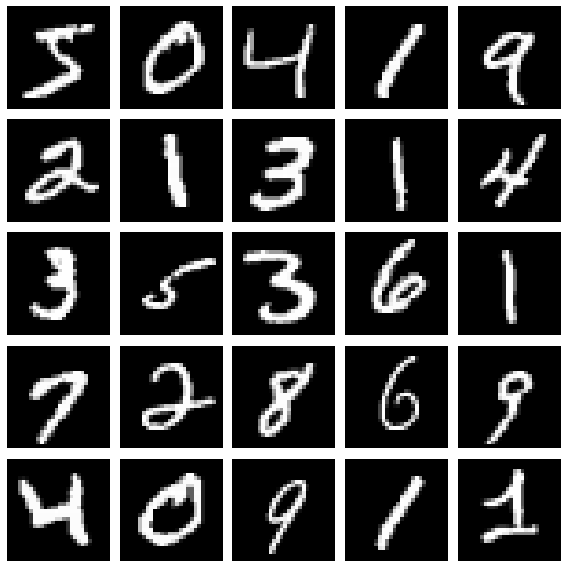

In [25]:
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
axs = axs.flatten()
for img, ax in zip(x_train[:25], axs):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

おまけに言っておくと，画像データも結局は数値データになります．白黒画像だと，それぞれの画素に[0,255]の範囲で値が入り，それに応じて白くしたり黒くしたりしています．   
また，カラー画像は色々な表現方法がありますが，Red, Green, Blueの3色を混ぜることで様々な色を表現しており，それぞれの画素に[0, 255]の範囲で(R,G,B)の順番で格納されています

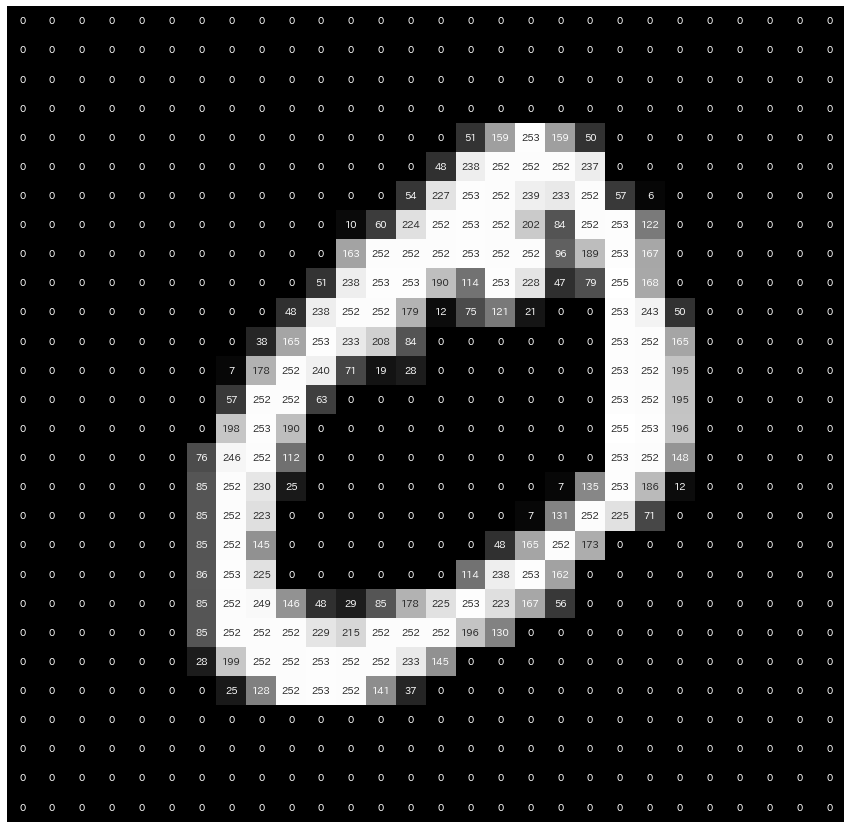

In [26]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(x_train[1], cmap='gray', cbar=False, annot=True, fmt='.3g')
plt.axis('off')
plt.show()

つまり，グレースケールの画像はただの２次元配列になるのです．(カラーになると3次元配列になりますが少し難しいと思われますので今回は割愛）  
事前に用意されているネットワークを用いて，推論する処理を実装します

### データの読み込み関数

In [27]:
def get_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255
    return (x_train, y_train), (x_test, y_test)


### 事前に用意されたモデルの重みを取得

In [28]:
def init_network():
    network: dict
    weights: np.ndarray

    # 事前に用意しておいたモデルを持ってきます
    weights = np.load('./about_model//weights.npy', allow_pickle=True)
    network = {}
    network['W1'] = weights[0]
    network['b1'] = weights[1]
    network['W2'] = weights[2]
    network['b2'] = weights[3]
    network['W3'] = weights[4]
    network['b3'] = weights[5]

    return network


### 推論（予測）フェーズの為の関数

In [29]:
def predict(network, x):
    # 与えられたネットワーク重み取得
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 24x24の2次元配列になっており，都合が悪いので，ベクトルに変換
    x = x.reshape(-1, 28*28)
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y


用意した関数を用いて計算してみる

In [30]:
(x_train, y_train), (x_test, y_test) = get_data()
network = init_network()
for i in range(10):
    # データを1つずつ取得
    x = x_test[i]
    y = predict(network, x)
    print('{}個目のデータ -> 予測ラベル：{}, 正解ラベル：{}'.format(i, y.argmax(), y_test[i]))

y.sum()


0個目のデータ -> 予測ラベル：7, 正解ラベル：7
1個目のデータ -> 予測ラベル：2, 正解ラベル：2
2個目のデータ -> 予測ラベル：1, 正解ラベル：1
3個目のデータ -> 予測ラベル：0, 正解ラベル：0
4個目のデータ -> 予測ラベル：4, 正解ラベル：4
5個目のデータ -> 予測ラベル：1, 正解ラベル：1
6個目のデータ -> 予測ラベル：4, 正解ラベル：4
7個目のデータ -> 予測ラベル：9, 正解ラベル：9
8個目のデータ -> 予測ラベル：6, 正解ラベル：5
9個目のデータ -> 予測ラベル：9, 正解ラベル：9


1.0

### バッチ計算
上のコードで，機能的な要件は満たしているが，実はループで計算するよりも，多次元配列で並列的に計算した方がより効率的です（他にもまとめて計算した方が良い理由はありますが）．  
そこで，データを一つ一つ与えるのではなく，複数のデータを1つの要素とした配列を構成し，一回のループで一気に複数データを計算するような仕組みをバッチ計算と言います

In [31]:
W1 = network['W1']
W2 = network['W2']
W3 = network['W3']
print(W1.shape)
print(W2.shape)
print(W3.shape)

(784, 512)
(512, 512)
(512, 10)


In [33]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 2, 5, 4])
a == b

array([ True,  True, False,  True])

In [32]:
(_, _), (x_test, y_test) = get_data()

batch_size = 100

accuracy_cnt = 0

for i in range(0, len(x_test), batch_size):
    # ここでバッチに分けています
    x_batch = x_test[i:i+batch_size]

    y_batch = predict(network, x_batch)
    # バッチごとに，確率最大となっているラベル（予測ラベル）を取得
    p = np.argmax(y_batch, axis=1)
    # 正解ラベルと一致している個数の取得
    accuracy_cnt += np.sum(p == y_test[i:i+batch_size])

print('Accuracy: ' + str(float(accuracy_cnt) / len(x_test)))

Accuracy: 0.9785
